# MODULES IMPORT

In [2]:
import numpy as np              #numpy library is used to work with multidimensional array.
import pandas as pd             #panda used for data manipulation and analysis.
                 
import os                       #os library is used for loading file to use in the program
import json                     #json library parses json into a string or dict, and convert string or dict to json file.
from pathlib import Path        #support path

import matplotlib.pyplot as plt #support ploting a figure
from matplotlib import colors   #colors support converting number or argument into colors

In [3]:
import tensorflow as tf

# DATA IMPORT

In [4]:
# get the path for training_task, evaluation_task, and test_task
data_path = Path('./data')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

#from the path above, we load the tests file's directory into our training_tasks, evaluation_tasks, and test_tasks variables
#the sorted() function is just for the list of directory to maintain some order
training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
test_tasks = sorted(os.listdir(test_path))

print("Number of examples in training corpus is ",len(training_tasks))
print("Number of examples in evaluation corpus is ",len(evaluation_tasks))
print("Number of examples in testing corpus is ",len(test_tasks))

Number of examples in training corpus is  400
Number of examples in evaluation corpus is  400
Number of examples in testing corpus is  100


In [5]:
print(training_tasks[:3])     #printing the first 3 elements of training_tasks
print(evaluation_tasks[:3])   #printing the first 3 elements of evaluation_tasks
print(test_tasks[:3])         #printing the first 3 elements of test_tasks

['007bbfb7.json', '00d62c1b.json', '017c7c7b.json']
['00576224.json', '009d5c81.json', '00dbd492.json']
['00576224.json', '009d5c81.json', '00dbd492.json']


In [6]:
#Get the first file of the training_tasks
training_task_file = str(training_path / training_tasks[0])

#Get the first file of the evaluation_tasks
evaluation_task_file = str(evaluation_path / evaluation_tasks[0])

#Get the first file of the test_tasks
test_task_file = str(test_path / test_tasks[0])

#open the file and load it
with open(training_task_file, 'r') as f:   
    #can change training_task_file to evaluation_task_file or test_task_file to have a look at evaluation file or test file
    task = json.load(f)

#using json to load the file, the task variable now is a dictionary with keys and values, we go on and print out the keys
print(task.keys())

dict_keys(['test', 'train'])


In [7]:
# The number of "train" and "test" in one training example.
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


In [8]:
#display the data structure of a training's input and output
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 7, 7], [7, 7, 7], [0, 7, 7]]

[[0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [7, 7, 7, 7, 7, 7, 7, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7]]

# FUNCTION TO PLOT IMAGES

In [9]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

#plotting the training task and the test task.
def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        #axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        #axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        #axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        #axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        #axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        #axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        #axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        #axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

000 data\training\007bbfb7.json


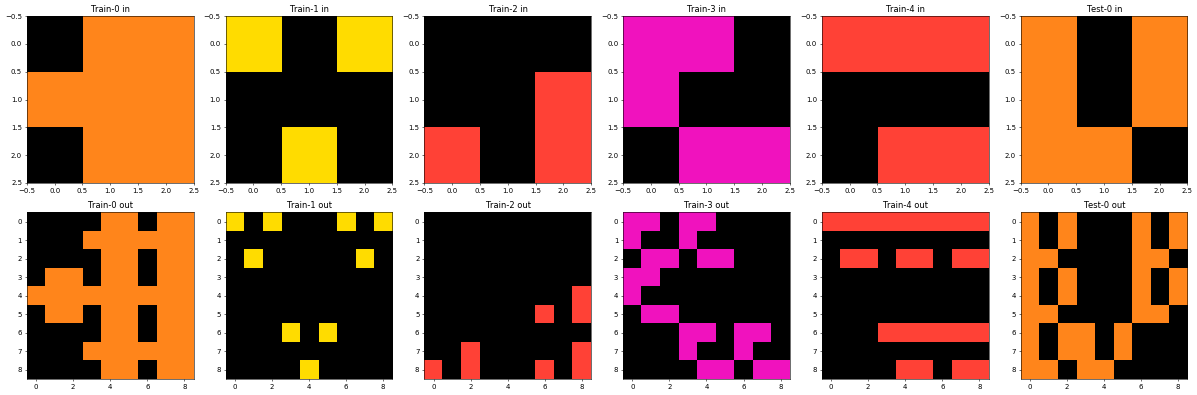

001 data\training\00d62c1b.json


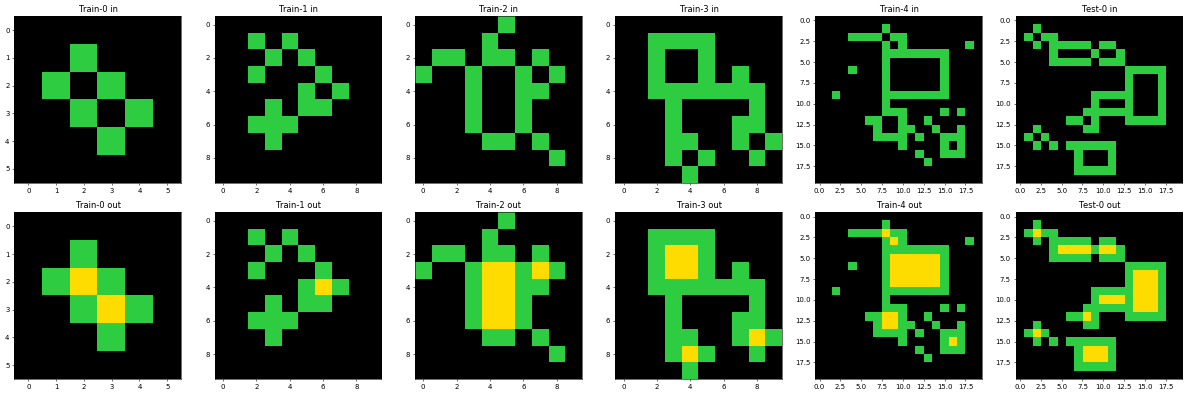

002 data\training\017c7c7b.json


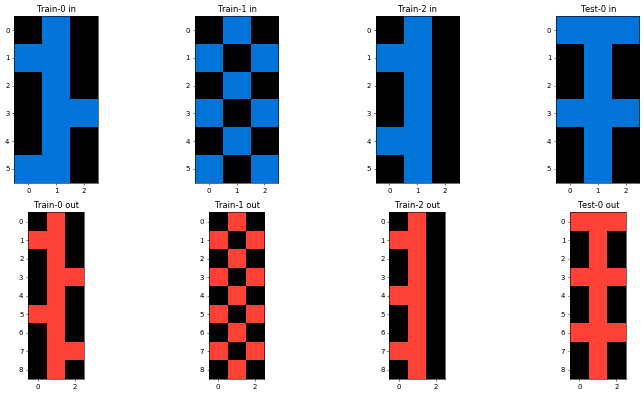

In [10]:
#plotting the first three training tasks.
for i, json_path in enumerate(training_tasks[:3]):   # can change to evaluation_tasks or test_tasks to view the evaluation and test task
    
    task_file = str(training_path / json_path)       # can change to evaluation_path or test_path to view the evaluation and test task

    with open(task_file, 'r') as f:
        task = json.load(f)

    print(f"{i:03d}", task_file)
    plot_task(task)

# PROVE

In [11]:
task_file = str(training_path / training_tasks[0])       # can change to evaluation_path or test_path to view the evaluation and test task

with open(task_file, 'r') as f:
    task = json.load(f)

In [12]:
tf.one_hot(task['train'][0]['input'], 10)

<tf.Tensor: shape=(3, 3, 10), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]], dtype=float32)>

In [13]:
ten=tf.one_hot(task['train'][0]['input'], 10)

In [14]:
tf.math.argmax(ten, axis=-1)

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[0, 7, 7],
       [7, 7, 7],
       [0, 7, 7]], dtype=int64)>

In [15]:
pro=tf.constant(task['train'][0]['input'])
tf.where(pro==0, 0, 1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 1],
       [1, 1, 1],
       [0, 1, 1]])>

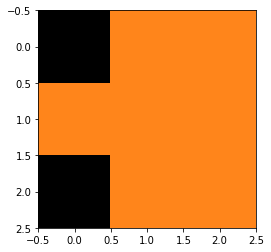

In [16]:
plt.imshow(task['train'][0]['input'], cmap=cmap, norm=norm)

In [17]:
data=[]
label=[]
for pair in task['train']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
trainset = tf.data.Dataset.from_tensor_slices((data, label))

In [18]:
data=[]
label=[]

for pair in task['test']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
valset = tf.data.Dataset.from_tensor_slices((data, label))


In [19]:
for xb, yb in valset.batch(5):
    print(xb[0])
    print(yb[0])
    break

tf.Tensor(
[[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]], shape=(3, 3, 10), dtype=float32)
tf.Tensor(
[[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0

In [20]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,3,10)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(27, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(81, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Reshape((6,6,100)),
    tf.keras.layers.Dense(810, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(810, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(810, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(810, activation='relu'),
    tf.keras.layers.Reshape((9,9,360)),
    tf.keras.layers.Dense(900, activation='relu'),
    tf.keras.layers.Dense(243, activation='relu'),
    tf.keras.layers.Dense(243, activation='relu'),
    tf.keras.layers.Dense(243),
    tf.keras.layers.Dense(90),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])

  optimizer = tf.keras.optimizers.Adam(0.01)

  model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [295]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, input_shape=(3,3,10), kernel_size=3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(10, kernel_size=3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(10, kernel_size=3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.UpSampling2D((3,3)),
    tf.keras.layers.Conv2D(10, kernel_size=3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [326]:
def build_model():
    images = tf.keras.layers.Input(shape=(3,3,10))
    conv=tf.keras.layers.Conv2D(filters=10, kernel_size=(1,1),
                          padding='same', activation='elu')(images)
    #conv=tf.keras.layers.BatchNormalization()(conv)
    #conv=tf.keras.layers.ReLU()(conv)
    upsamp=tf.keras.layers.UpSampling2D((3,3))(conv)
    conv=tf.keras.layers.concatenate([conv, conv, conv], axis=1)
    conv=tf.keras.layers.concatenate([conv, conv, conv], axis=2)
    conv=tf.keras.layers.concatenate([conv, upsamp])
    conv=tf.keras.layers.Conv2D(10, kernel_size=(1,1), padding='same', activation='elu')(conv)
    conv=tf.keras.layers.Dropout(rate=0.3)(conv)
    conv=tf.keras.layers.Dense(10)(conv)
    conv=tf.keras.layers.Softmax()(conv)

    model = tf.keras.models.Model(inputs=[images], outputs=[conv])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model

In [327]:
model=build_model()
model.summary()

Model: "model_50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_60 (InputLayer)           [(None, 3, 3, 10)]   0                                            
__________________________________________________________________________________________________
conv2d_114 (Conv2D)             (None, 3, 3, 10)     110         input_60[0][0]                   
__________________________________________________________________________________________________
concatenate_144 (Concatenate)   (None, 9, 3, 10)     0           conv2d_114[0][0]                 
                                                                 conv2d_114[0][0]                 
                                                                 conv2d_114[0][0]                 
___________________________________________________________________________________________

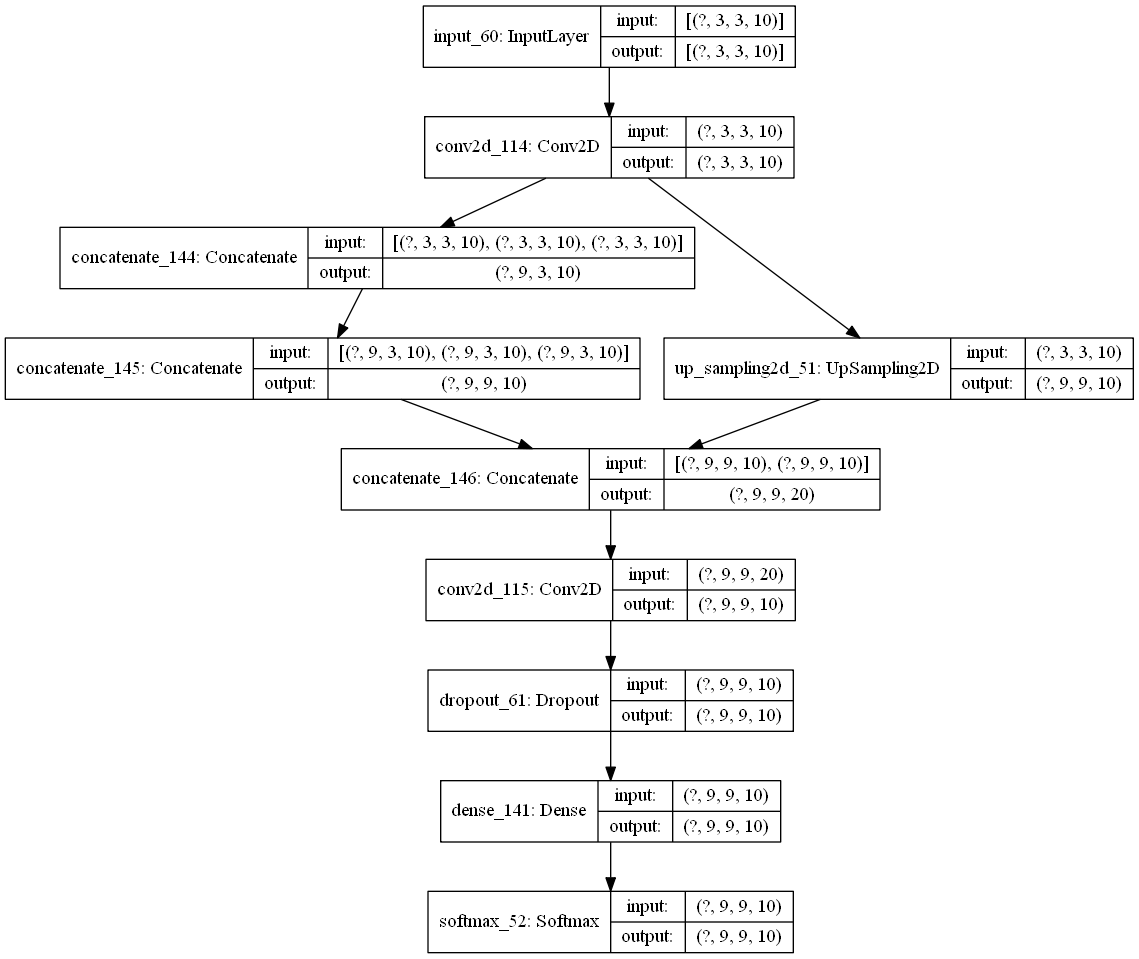

In [328]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True, show_layer_names=True)

In [329]:
EPOCHS = 50

history = model.fit(trainset.batch(5),validation_data=valset.batch(1),  epochs=EPOCHS)

Train for 1 steps, validate for 1 steps
Epoch 1/50
1/1 [==============================] - 1s 591ms/step - loss: 2.3622 - mae: 0.1801 - mse: 0.0911 - val_loss: 2.1224 - val_mae: 0.1755 - val_mse: 0.0863
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 2.2652 - mae: 0.1782 - mse: 0.0892 - val_loss: 2.0082 - val_mae: 0.1726 - val_mse: 0.0836
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 2.1127 - mae: 0.1747 - mse: 0.0859 - val_loss: 1.8951 - val_mae: 0.1694 - val_mse: 0.0807
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 2.0018 - mae: 0.1719 - mse: 0.0832 - val_loss: 1.7808 - val_mae: 0.1658 - val_mse: 0.0774
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 1.8931 - mae: 0.1685 - mse: 0.0803 - val_loss: 1.6653 - val_mae: 0.1617 - val_mse: 0.0738
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 1.7176 - mae: 0.1624 - mse: 0.0751 - val_loss: 1.5475 - val_mae: 0.1570 - val_mse: 

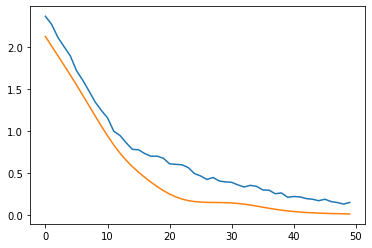

In [330]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

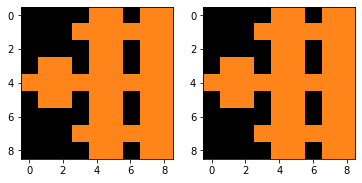

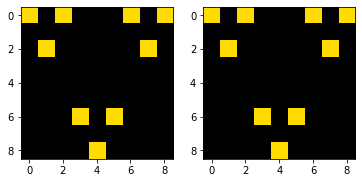

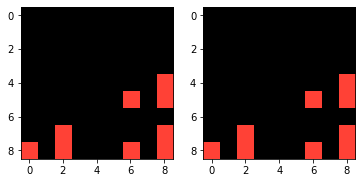

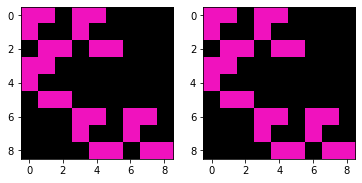

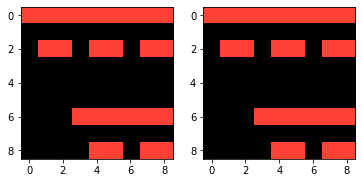

In [331]:
for xb, yb in trainset.batch(5).take(1):
    for i in range(0,5):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

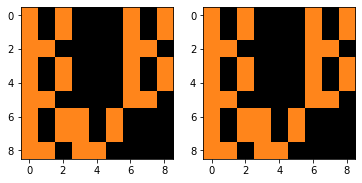

In [332]:
for xb, yb in valset.batch(1):
    for i in range(0,1):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()